Bank Churn

Given a Bank customer, build a neural network based classifier that can determine whether they will leave
or not in the next 6 months.

Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers
leaving and joining another service provider. It is important to understand which aspects of the service
influence a customer's decision in this regard. Management can concentrate efforts on improvement of
service, keeping in mind these priorities.

In [242]:
##Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
##Connect Google Colab to Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
##Read data file:
data = pd.read_csv('/content/drive/My Drive/DLCP/bank.csv')

In [245]:
##Check data:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [246]:
##Check datatype:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [247]:
## Check for NULLs:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [248]:
##Check stats:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [249]:
##Drop the columns which are unique for all users like IDs:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [250]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [251]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [252]:
##Turn Geography content into categorical:
numerical = data.select_dtypes('number')
categorical = data.select_dtypes('object')

In [253]:
categorical = pd.get_dummies(categorical)

In [254]:
categorical.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [255]:
data_merge=pd.concat([categorical, numerical], axis=1)  

In [256]:
data_merge.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [257]:
data_merge.describe()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.501400,0.250900,0.247700,0.454300,0.545700,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,0.500023,0.433553,0.431698,0.497932,0.497932,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


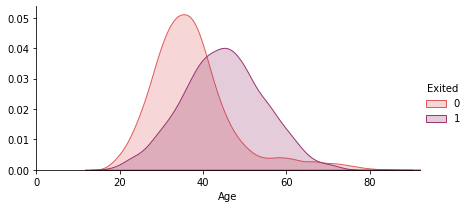

In [258]:
facet = sns.FacetGrid(data_merge, hue="Exited",aspect=2, palette='flare')
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, data_merge["Age"].max()))
facet.add_legend()
plt.show()


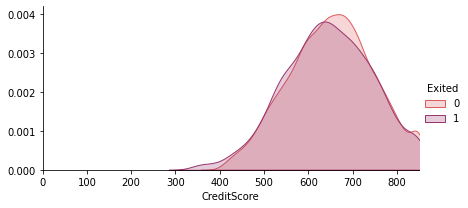

In [259]:
facet = sns.FacetGrid(data, hue="Exited",aspect=2, palette='flare')
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, data["CreditScore"].max()))
facet.add_legend()
plt.show()

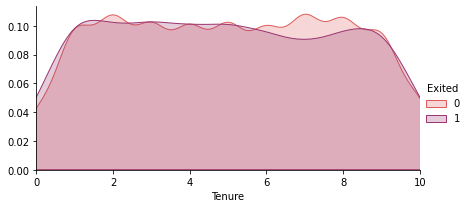

In [260]:
facet = sns.FacetGrid(data, hue="Exited", aspect=2, palette='flare')
facet.map(sns.kdeplot,"Tenure",shade= True)
facet.set(xlim=(0, data["Tenure"].max()))
facet.add_legend()
plt.show()

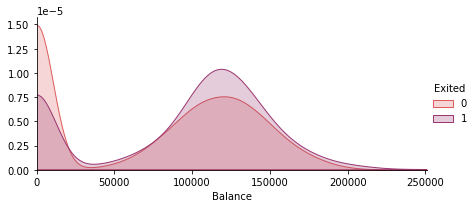

In [261]:
facet = sns.FacetGrid(data, hue="Exited",aspect=2, palette='flare')
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, data["Balance"].max()))
facet.add_legend()
plt.show()

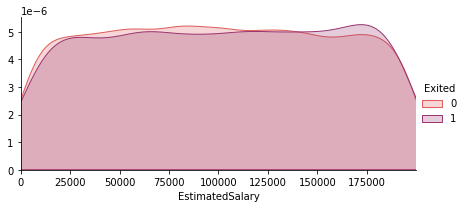

In [262]:
facet = sns.FacetGrid(data, hue="Exited",aspect=2, palette='flare')
facet.map(sns.kdeplot,"EstimatedSalary",shade= True)
facet.set(xlim=(0, data["EstimatedSalary"].max()))
facet.add_legend()
plt.show()

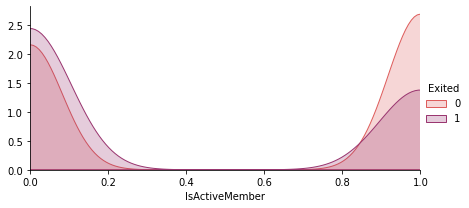

In [263]:
facet = sns.FacetGrid(data, hue="Exited",aspect=2, palette='flare')
facet.map(sns.kdeplot,"IsActiveMember",shade= True)
facet.set(xlim=(0, data["IsActiveMember"].max()))
facet.add_legend()
plt.show()

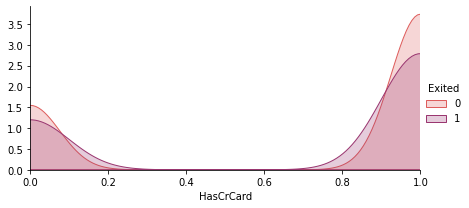

In [264]:
facet = sns.FacetGrid(data, hue="Exited",aspect=2, palette='flare')
facet.map(sns.kdeplot,"HasCrCard",shade= True)
facet.set(xlim=(0, data["HasCrCard"].max()))
facet.add_legend()
plt.show()

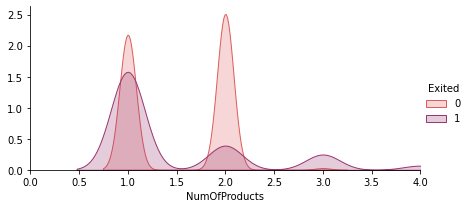

In [265]:
facet = sns.FacetGrid(data, hue="Exited",aspect=2, palette='flare')
facet.map(sns.kdeplot,"NumOfProducts",shade= True)
facet.set(xlim=(0, data["NumOfProducts"].max()))
facet.add_legend()
plt.show()

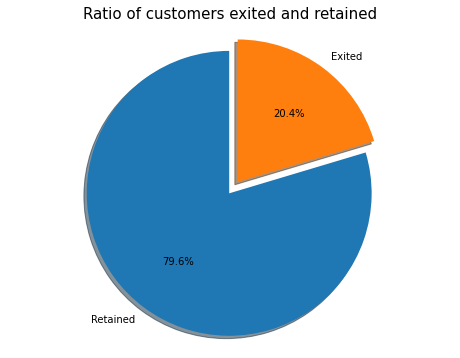

In [266]:

labels ='Retained', 'Exited'
sizes = [data_merge.Exited[data_merge['Exited']==0].count(), data_merge.Exited[data_merge['Exited']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Ratio of customers exited and retained", size = 15)
plt.show()

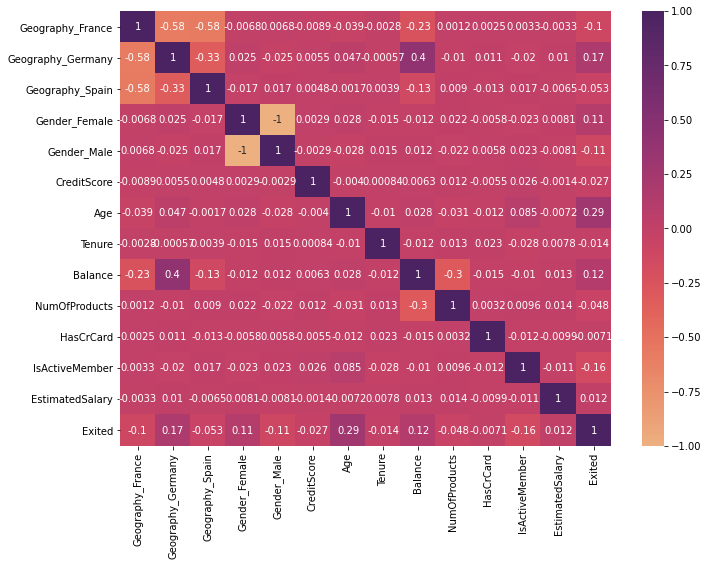

In [267]:
plt.subplots(figsize=(11,8))
sns.heatmap(data_merge.corr(), annot=True, cmap="flare")
plt.show()

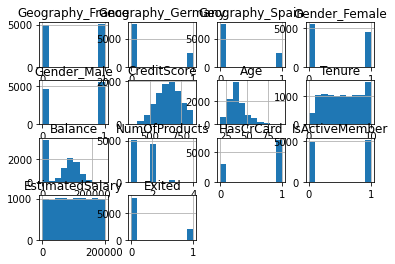

In [268]:
from matplotlib import pyplot
data_merge.hist()
pyplot.show()

Target=Exited Yes or No

Features are Age, Geography, Gender, Balance, Number of Products, Credit Score, Estimated Salary, Balance and Other products, Has credit Cards


In [269]:
##Normalize data:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
dataset=trans.fit_transform(X)
dataset=pd.DataFrame(dataset)

In [270]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,1.0,0.0,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,1.0,0.0,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,1.0,0.0,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.0,0.0,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [271]:
##Split data:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 1:13]
y = data_merge.Exited
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train =  np.array(y_train)
y_test =  np.array(y_test)
print('X train shape:\t', X_train.shape)
print('y train shape:\t', y_train.shape)
print('X test shape:\t', X_test.shape)
print('y test shape:\t', y_test.shape)

X train shape:	 (8000, 9)
y train shape:	 (8000,)
X test shape:	 (2000, 9)
y test shape:	 (2000,)


In [272]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,1.0,0.0,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,1.0,0.0,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,1.0,0.0,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.0,0.0,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [273]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
ncols = X_train.shape[0]

# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(200, activation='relu', kernel_initializer='normal'))

# second hidden layer
model.add(Dense(100, activation='relu', kernel_initializer='normal'))


# Add an output layer with one neuron and no activation specified
model.add(Dense(1))
optimizer = tf.keras.optimizers.Adam(0.01)


model.compile(loss='mean_squared_error',
              optimizer=optimizer ,  metrics = ["accuracy"])
                   

epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



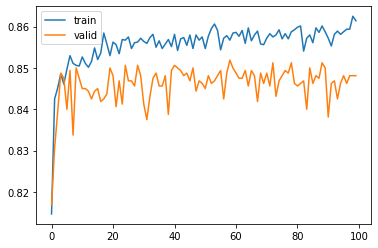

In [274]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [275]:
loss = model.evaluate(X_test, y_test, verbose=False)

In [276]:
y_pred = np.round(model.predict(X_test))
y_pred = (y_pred > 0.5)

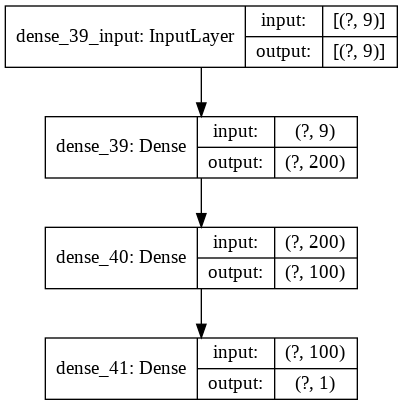

In [277]:
# show network structure
keras.utils.plot_model(model, "network.png", show_shapes=True)

In [278]:
##Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [279]:
print(cm)


[[1544   51]
 [ 231  174]]


In [280]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
accuracy(cm)

0.859

In [281]:
##Trying to improve the results by using a different optimizer, activation, changing number of epochs:

# Initialize the constructor
from functools import partial
model = Sequential()

# Add an first hidden layer 
model.add(Dense(200, activation=partial(tf.nn.leaky_relu, alpha=0.01), kernel_initializer='normal'))

# second hidden layer
model.add(Dense(100, activation=partial(tf.nn.leaky_relu, alpha=0.01), kernel_initializer='normal'))


# Add an output layer with one neuron and no activation specified
model.add(Dense(1))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)


model.compile(loss='mean_squared_error',
              optimizer=optimizer ,  metrics = ["accuracy"])
                   

epochs = 60
history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



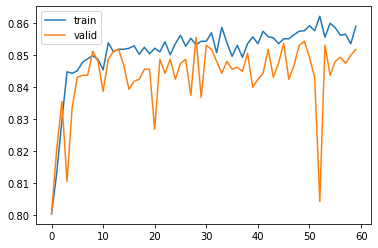

In [282]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [283]:
loss = model.evaluate(X_test, y_test, verbose=False)

In [284]:
y_pred = np.round(model.predict(X_test))
y_pred = (y_pred > 0.5)

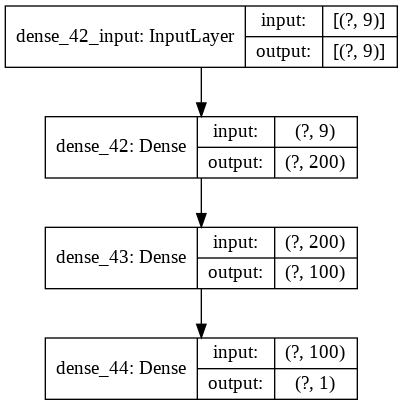

In [285]:
# show network structure
keras.utils.plot_model(model, "network.png", show_shapes=True)

In [286]:
##Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [287]:
print(cm)


[[1534   61]
 [ 219  186]]


In [288]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
accuracy(cm)

0.86

Conclusion: Adam seems to be getting better accuracy, by a tad.


In [ ]:
Both models perform approximately the same.